Задание 5
1. Считать данные из файла и вывести последние 20 его строк (метод tail()). 
2. Проверить наличие пропусков в файле. Если пропуски найдены, то заменить их на среднее значение по заданному признаку (столбцу). 
3. Вычислить количество мужчин и женщин старше 20 лет. И для каждого пола определить суммарные траты (столбец Annual Income). 
4. Оценить корреляцию Пирсона для столбцов Age и Genre (преобразовать данные столбца Genre в числовые значения). 
5. Сохранить в новый файл (output.csv) данные по покупателям, у которых Annual Income >100. 
6. Для данных о покупателях построить диаграмму рассеивания зависимости трат от возраста (по десятилетиям). 
7. Построить столбчатую диаграмму по распределению возрастов (по интервалу 5 лет). 


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.ticker as ticker
import matplotlib.image as image
table = pd.read_csv('Mall_Customers.csv', sep=',', index_col='CustomerID')

Пункт 1

In [45]:
table.tail(20)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
181,Female,37.0,97.0,32.0
182,Female,32.0,97.0,86.0
183,Male,46.0,98.0,15.0
184,Female,29.0,98.0,88.0
185,Female,41.0,99.0,39.0
186,Male,30.0,99.0,97.0
187,Female,54.0,101.0,24.0
188,Male,28.0,101.0,68.0
189,Female,41.0,103.0,17.0


Пункт 2

In [46]:
table.count()

Genre                     199
Age                       199
Annual Income (k$)        199
Spending Score (1-100)    199
dtype: int64

In [47]:

averageAge = table['Age'].mean()
table['Age']=table['Age'].fillna(averageAge)

averageIncome =  table['Annual Income (k$)'].mean()
table['Annual Income (k$)']=table['Annual Income (k$)'].fillna(averageIncome)

averageScore =  table['Spending Score (1-100)'].mean()
table['Spending Score (1-100)']= table['Spending Score (1-100)'].fillna(averageScore)
table



,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19.000000,15.000000,50.256281
2,NaN,21.000000,60.788945,81.000000
3,Female,38.944724,16.000000,6.000000
4,Female,23.000000,16.000000,77.000000
5,Female,31.000000,17.000000,40.000000
...,...,...,...,...
196,Female,35.000000,120.000000,79.000000
197,Female,45.000000,126.000000,28.000000
198,Male,32.000000,126.000000,74.000000


Пункт 3

In [13]:
sumM = table.query('Genre == "Male" & Age>20').count()
print("Количество мужчин старше 20:", sumM[0])
sumF = table.query('Genre == "Female" & Age>20').count()
print("Количество женщин старше 20:", sumF[0])
sumMF = table.query('Age>20').count()
print("Количество мужчин и женщин старше 20:", sumMF[0])

male = table.query('Genre == "Male"&Age>20')
sumIncome = male['Annual Income (k$)'].sum()
print("Доход всех мужчин старше 20:", sumIncome)
female = table.query('Genre == "Female" & Age>20')
sumIncome1 = female['Annual Income (k$)'].sum()
print("Доход всех женщин старше 20:", sumIncome1)

Количество мужчин старше 20: 76
Количество женщин старше 20: 107
Количество мужчин и женщин старше 20: 183
Доход всех мужчин старше 20: 4853.0
Доход всех женщин старше 20: 6390.0


Пункт 4

In [26]:
table_copy=table.copy()
table_copy['Genre'] = table_copy['Genre']. replace (["Male","Female"], [1,2]).astype (int)
x=table_copy['Age'].corr(table_copy['Genre'],method='pearson')
print(x)

-0.05509552763295648


Пункт 5

In [15]:
output=table.loc[(table['Annual Income (k$)']>100)]
output.to_csv('output.csv')

Пункт 6

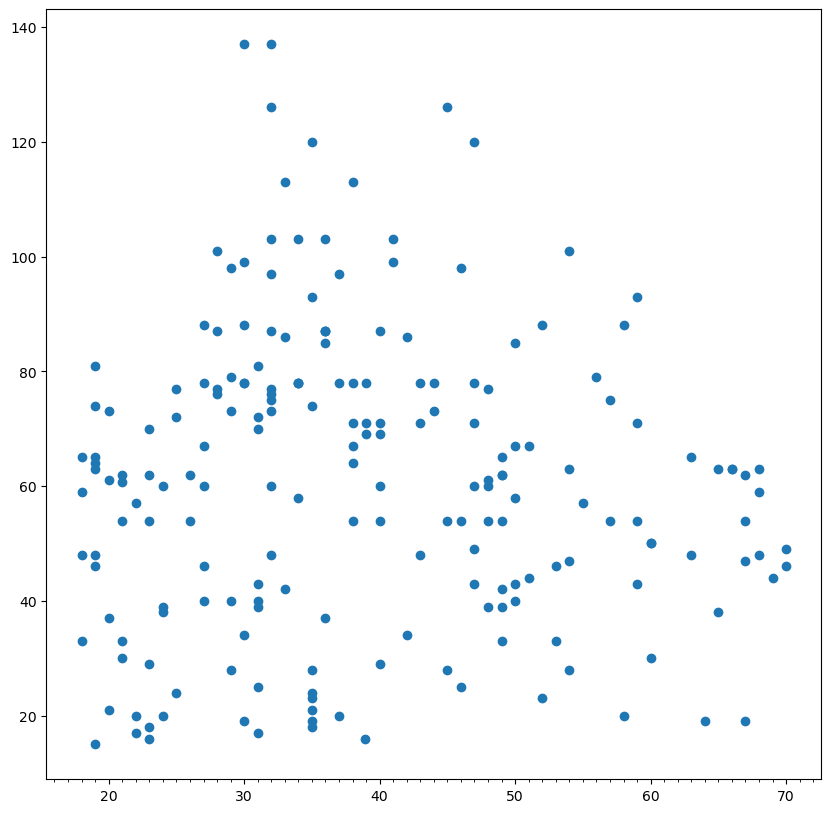

In [48]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

ax.scatter(table['Age'], table['Annual Income (k$)']);

Пункт 7

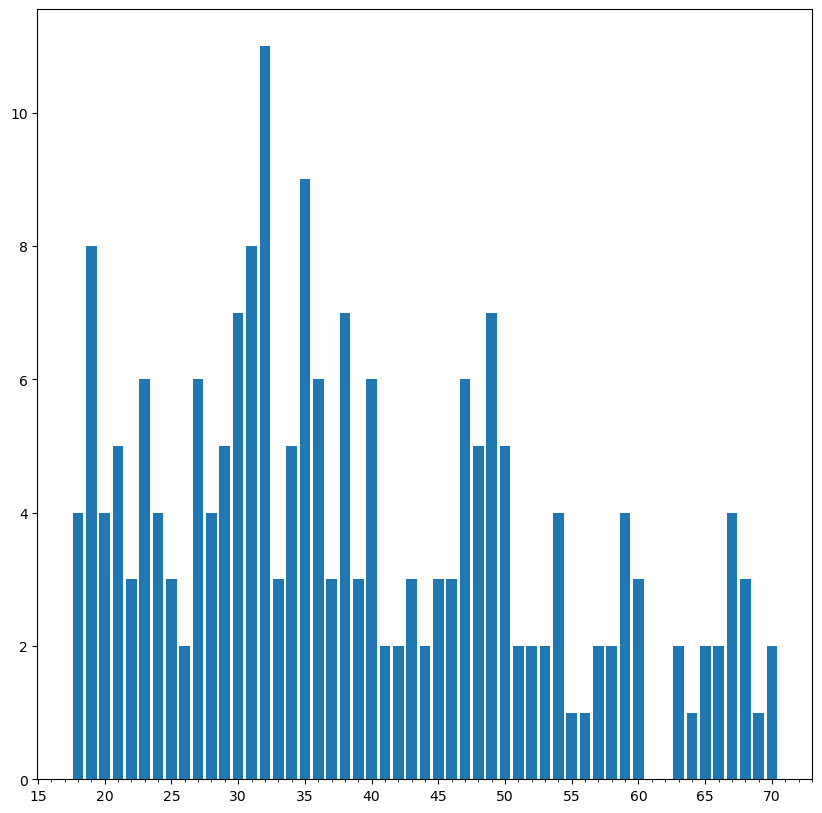

In [49]:
age = table['Age'].dropna().astype(int).value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10, 10))
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

ax.bar(age.index, age);